1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [1]:
import pandas as pd
import numpy as np
import numpy.random as npr
from scipy import linalg as la
from IPython.display import display
import matplotlib.pyplot as plt

results using the eigendecomposition of the covariance matrix

real(eigenvalues):
 [ 2.81044228e+01 -1.76540479e-15  1.93432107e+00] 

eigenvectors:
 [[-0.1110986  -0.81649658  0.56656018]
 [-0.58279307 -0.40824829 -0.70262761]
 [-0.80499027  0.40824829  0.43049274]] 

results using the single value decomposition of the covariance matrix

real(eigenvalues):
 [2.81044228e+01 1.93432107e+00 5.36157299e-16] 

eigenvectors:
 [[-0.1110986   0.56656018 -0.81649658]
 [-0.58279307 -0.70262761 -0.40824829]
 [-0.80499027  0.43049274  0.40824829]] 

both methods return the same eigenvectors

total variability explained by each component:
- component 1 explains 0.936 of the variability (93.561%)
- component 2 explains 0.064 of the variability (6.439%)
- component 3 explains 0.000 of the variability (0.000%)
 since the third column is a linear combination of the first two,
 it makes sense that the last component bears a very small variability,
 while component 2 is partially derived from component 

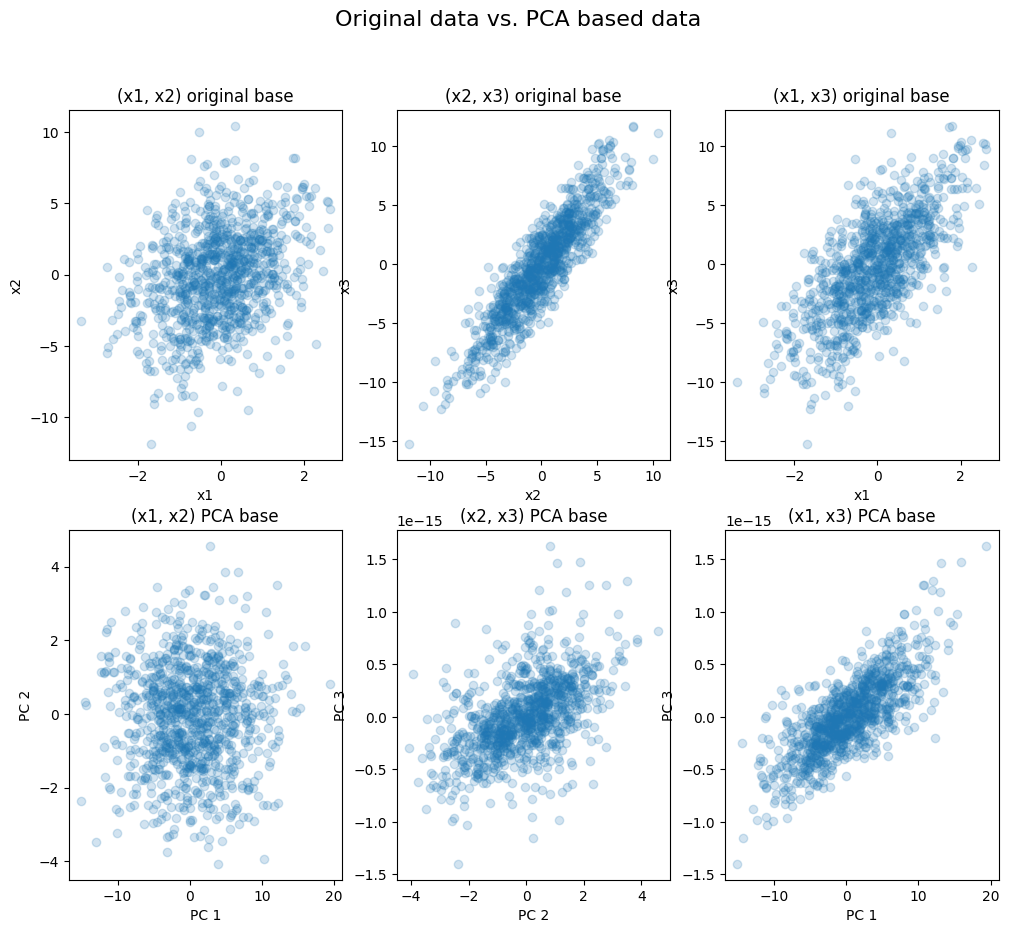

please also note that the axis differ a bit.
the plots obtained with the PC base are less spread out overall.


In [2]:
# define the parameters and the dataset
size = 1000
x1 = npr.normal(loc=0, scale=1, size=size)
x2 = x1 + npr.normal(loc=0, scale=3, size=size)
x3 = 2*x1 + x2

df = pd.DataFrame({
    'x1' : x1,
    'x2' : x2,
    'x3' : x3,
})

# display(df)

# we need to sort the eigenvectors matrix since the different methods
# tend to return the same vectors but in different order
def sort_matrix(matrix):
  sorted = np.sort(np.sort(matrix, axis=0), axis=1)
  return sorted

# calculate the covariance matrix
cov = np.cov(df, rowvar = False)

# find the eigenvalues using the eigendecomposition of the covariance matrix
val1, vec1 = la.eig(cov)
print("results using the eigendecomposition of the covariance matrix\n")
print("real(eigenvalues):\n", np.real_if_close(val1), '\n')
# printing the eigenvectors
print("eigenvectors:\n", vec1, '\n')

# find the eigenvalues using the SVD of the matrix
vec2, val2, _ = la.svd(cov)
print("results using the single value decomposition of the covariance matrix\n")
print("real(eigenvalues):\n", np.real_if_close(val2), '\n')
print("eigenvectors:\n", vec2, '\n')
if np.allclose(sort_matrix(np.abs(vec1)), sort_matrix(np.abs(vec2))):
    print('both methods return the same eigenvectors\n')
else:
    print('the two methods return different values\n')


# part 2: principal component analysis
variability = sum(val2)
fractionVariability = [(i / variability) for i in sorted(val2, reverse=True)]

# Print the results
print('total variability explained by each component:')
print('- component 1 explains %.3f of the variability (%.3f%%)' %(fractionVariability[0], fractionVariability[0]*100))
print('- component 2 explains %.3f of the variability (%.3f%%)' %(fractionVariability[1], fractionVariability[1]*100))
print('- component 3 explains %.3f of the variability (%.3f%%)' %(fractionVariability[2], fractionVariability[2]*100))

print(" since the third column is a linear combination of the first two,\n",
      "it makes sense that the last component bears a very small variability,\n",
      "while component 2 is partially derived from component 1 so its contribution\n",
      "is smaller but nonetheless not insignificant")

# we can retain 99% of the total varibility if we consider the first two components
# since the third is a deterministic function of the first two.
betterPrecision = (fractionVariability[0] + fractionVariability[1])/sum(fractionVariability)
print("with the first two components we retain %.3f (%.0f%%) of the total variability\n" % (betterPrecision, betterPrecision*100))

# data redefinition with the new base 
df_PCA = np.dot(df, vec2)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
fig.suptitle('Original data vs. PCA based data', fontsize=16)


# scatter plot of the original data
axs[0, 0].scatter(df['x1'], df['x2'], alpha=0.2)
axs[0, 0].set_title('(x1, x2) original base')
axs[0, 0].set_xlabel('x1')
axs[0, 0].set_ylabel('x2')

axs[0, 2].scatter(df['x1'], df['x3'], alpha=0.2)
axs[0, 2].set_title('(x1, x3) original base')
axs[0, 2].set_xlabel('x1')
axs[0, 2].set_ylabel('x3')

axs[0, 1].scatter(df['x2'], df['x3'], alpha=0.2)
axs[0, 1].set_title('(x2, x3) original base')
axs[0, 1].set_xlabel('x2')
axs[0, 1].set_ylabel('x3')


# scatter plots of the data after PCA
axs[1, 0].scatter(df_PCA[:,0], df_PCA[:,1], alpha=0.2)
axs[1, 0].set_title('(x1, x2) PCA base')
axs[1, 0].set_xlabel('PC 1')
axs[1, 0].set_ylabel('PC 2')

axs[1, 2].scatter(df_PCA[:,0], df_PCA[:,2], alpha=0.2)
axs[1, 2].set_title('(x1, x3) PCA base')
axs[1, 2].set_xlabel('PC 1')
axs[1, 2].set_ylabel('PC 3')

axs[1, 1].scatter(df_PCA[:,1], df_PCA[:,2], alpha=0.2)
axs[1, 1].set_title('(x2, x3) PCA base')
axs[1, 1].set_xlabel('PC 2')
axs[1, 1].set_ylabel('PC 3')

plt.show()

print("please also note that the axis differ a bit.")
print("the plots obtained with the PC base are less spread out overall.")

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

the eigenvalues of the noisy dataset are:

[27.79851467  0.21894627  2.1124379 ]

the eigenvalues of the noisy dataset are:

[[-0.11347269 -0.81930843  0.56201214]
 [-0.59011441 -0.39950085 -0.70154405]
 [-0.79930528  0.41125755  0.43815327]]



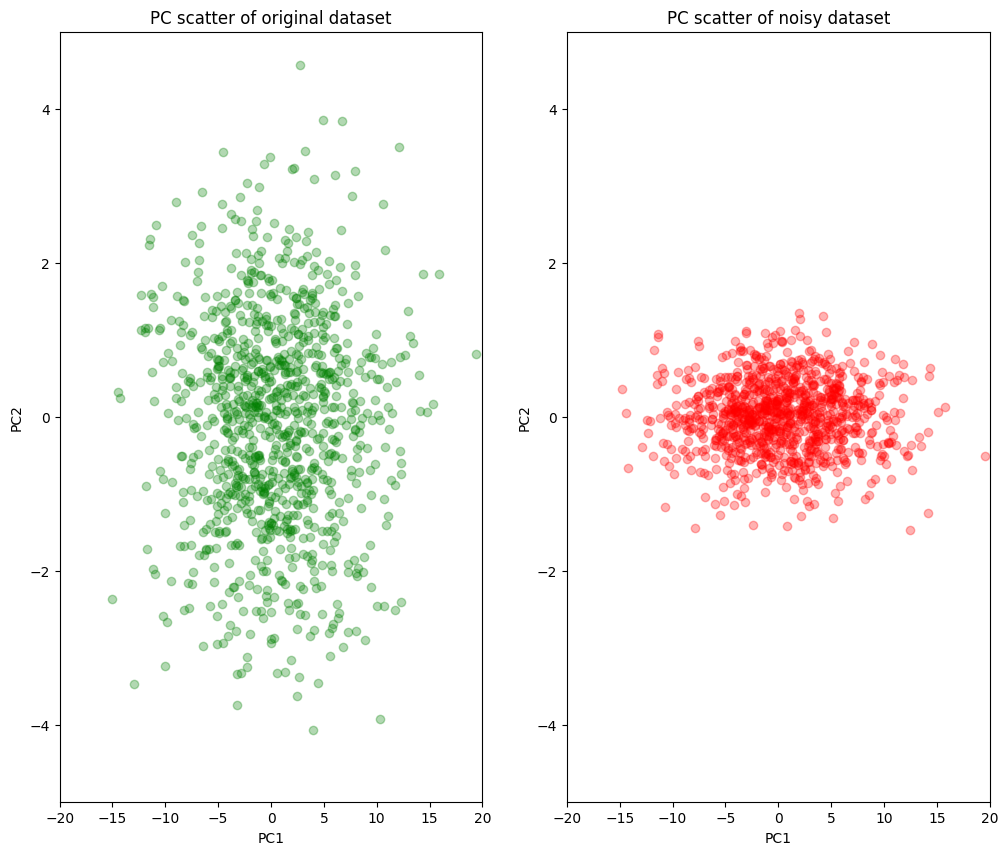

In [3]:


dev = 3/20
w = npr.normal(loc=0, scale=dev, size=(size,10,3))
# print(w.shape)
w = np.sum(w, axis = 1)
# print(w.shape)
noisy_df = df + w
# print(noisy_df.shape)

# calculating the eigenvectors of the matrix
noisycov = np.cov(noisy_df, rowvar=False)
val, vec = la.eig(noisycov)
val = np.real_if_close(val)
vec = np.real_if_close(vec)
print("the eigenvalues of the noisy dataset are:\n")
print(val)
print()
print("the eigenvalues of the noisy dataset are:\n")
print(vec)
print()

# use the new base (rotate the data)
noisy_rot_df = np.dot(noisy_df, vec)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
axs[0].scatter(df_PCA[:, 0], df_PCA[:, 1], color = 'g', alpha=0.3)
axs[0].set_xlabel("PC1")
axs[0].set_ylabel("PC2")
axs[0].set_title("PC scatter of original dataset")
axs[0].set_ylim([-5, 5])
axs[0].set_xlim([-20, 20])

axs[1].scatter(noisy_rot_df[:,0], noisy_rot_df[:,1], color = 'r', alpha=0.3)
axs[1].set_xlabel("PC1")
axs[1].set_ylabel("PC2")
axs[1].set_title("PC scatter of noisy dataset")
axs[1].set_ylim([-5, 5])
axs[1].set_xlim([-20, 20])
fig.show()



real(eigenvalues):
 [28.31807886  0.20998401  2.16277974] 

eigenvectors:
 [[-0.10861947 -0.81455941  0.56981995]
 [-0.58582922 -0.41064777 -0.69869345]
 [-0.80312262  0.40970889  0.43258835]] 

total variability explained by each component:
- component 1 explains 0.923 of the variability (92.269%)
- component 2 explains 0.070 of the variability (7.047%)
- component 3 explains 0.007 of the variability (0.684%)
with the first two components we retain 0.993 (99%) of the total variability



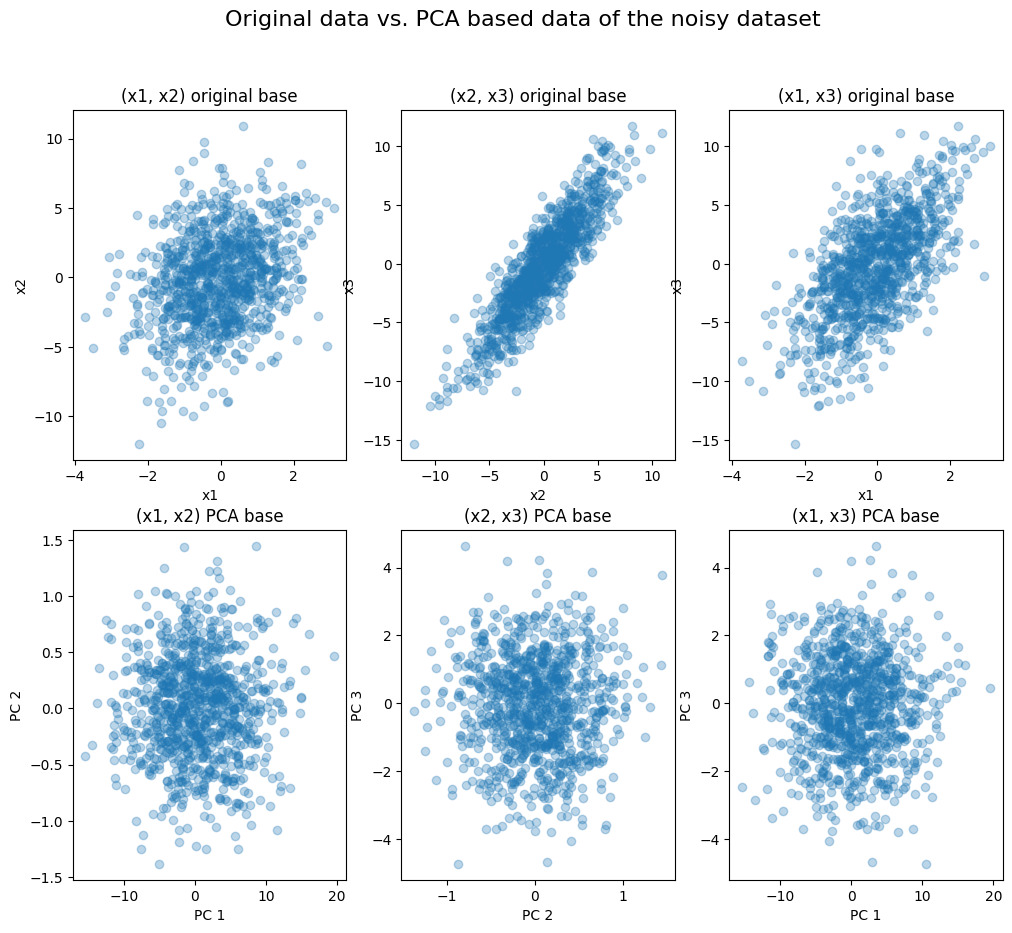

In [4]:
w = npr.normal(loc=0, scale=3/20, size=(size,10,3))
# print(w.shape)
w = np.sum(w, axis = 1)
# print(w.shape)
noisy_df = df + w
# print(noisy_df.shape)

# calculate the covariance matrix
cov = np.cov(noisy_df, rowvar = False)

# find the eigenvalues using the SVD of the matrix
val, vec = la.eig(cov)
vec = np.real_if_close(vec)
val = np.real_if_close(val)
print("real(eigenvalues):\n", np.real_if_close(val), '\n')
print("eigenvectors:\n", vec, '\n')


# part 2: principal component analysis
variability = sum(val)
fractionVariability = [(i / variability) for i in sorted(val, reverse=True)]

# Print the results
print('total variability explained by each component:')
print('- component 1 explains %.3f of the variability (%.3f%%)' %(fractionVariability[0], fractionVariability[0]*100))
print('- component 2 explains %.3f of the variability (%.3f%%)' %(fractionVariability[1], fractionVariability[1]*100))
print('- component 3 explains %.3f of the variability (%.3f%%)' %(fractionVariability[2], fractionVariability[2]*100))

betterPrecision = (fractionVariability[0] + fractionVariability[1])/sum(fractionVariability)
print("with the first two components we retain %.3f (%.0f%%) of the total variability\n" % (betterPrecision, betterPrecision*100))

# data redefinition with the new base 
noisy_df_PCA = np.dot(noisy_df, vec)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
fig.suptitle('Original data vs. PCA based data of the noisy dataset', fontsize=16)

# scatter plot of the original data
axs[0, 0].scatter(noisy_df['x1'], noisy_df['x2'], alpha=0.3)
axs[0, 0].set_title('(x1, x2) original base')
axs[0, 0].set_xlabel('x1')
axs[0, 0].set_ylabel('x2')

axs[0, 2].scatter(noisy_df['x1'], noisy_df['x3'], alpha=0.3)
axs[0, 2].set_title('(x1, x3) original base')
axs[0, 2].set_xlabel('x1')
axs[0, 2].set_ylabel('x3')

axs[0, 1].scatter(noisy_df['x2'], noisy_df['x3'], alpha=0.3)
axs[0, 1].set_title('(x2, x3) original base')
axs[0, 1].set_xlabel('x2')
axs[0, 1].set_ylabel('x3')


# scatter plots of the data after PCA
axs[1, 0].scatter(noisy_df_PCA[:,0], noisy_df_PCA[:,1], alpha=0.3)
axs[1, 0].set_title('(x1, x2) PCA base')
axs[1, 0].set_xlabel('PC 1')
axs[1, 0].set_ylabel('PC 2')

axs[1, 2].scatter(noisy_df_PCA[:,0], noisy_df_PCA[:,2], alpha=0.3)
axs[1, 2].set_title('(x1, x3) PCA base')
axs[1, 2].set_xlabel('PC 1')
axs[1, 2].set_ylabel('PC 3')

axs[1, 1].scatter(noisy_df_PCA[:,1], noisy_df_PCA[:,2], alpha=0.3)
axs[1, 1].set_title('(x2, x3) PCA base')
axs[1, 1].set_xlabel('PC 2')
axs[1, 1].set_ylabel('PC 3')

plt.show()

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [5]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,category
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


finding the eigenvectors and eigenvalues with covariance matrix eigendecomposition...

finding the eigenvectors and eigenvalues with singular value decomposition...

testing whether the two methods yield the same results...
--OK: both methods return the same eigenvectors

total variability explained by each component:
- component  1 explains 0.440 of the variability (44.047%)
- component  2 explains 0.258 of the variability (25.799%)
- component  3 explains 0.135 of the variability (13.498%)
- component  4 explains 0.089 of the variability (8.882%)
- component  5 explains 0.041 of the variability (4.085%)
- component  6 explains 0.029 of the variability (2.903%)
- component  7 explains 0.008 of the variability (0.785%)
- component  8 explains 0.000 of the variability (0.001%)
- component  9 explains 0.000 of the variability (0.000%)
- component 10 explains 0.000 of the variability (0.000%)


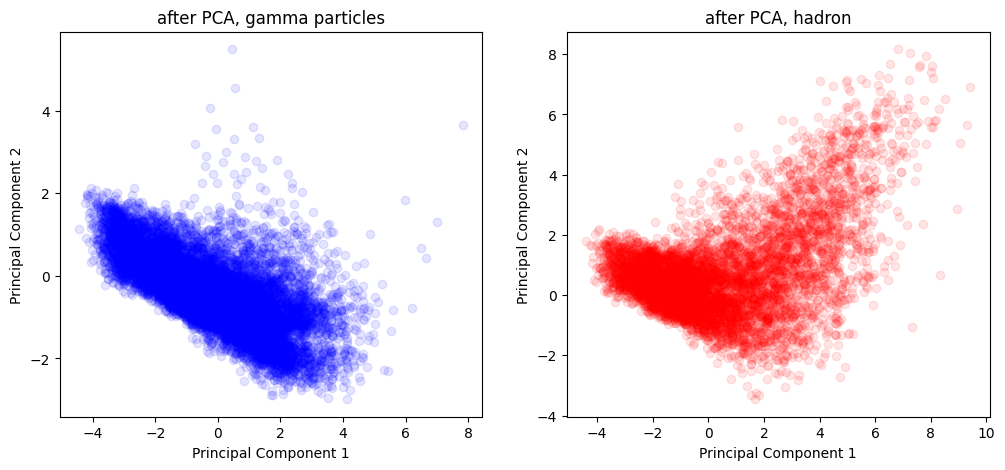

In [6]:
# open the dataser. The cathegories are specified in the magic04.names file
with open('data/magic04.data', 'r') as fdata, open('data/magic04.names') as fnames:
    data = pd.read_csv(fdata, names=['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'category'])

df = data.drop(columns='category')
display(data)
mask = data['category'].values == 'g'

######################### performing the decomposition #########################
# calculate the covariance matrix
cov = np.cov(df, rowvar = False)

# find the eigenvalues using the eigendecomposition of the covariance matrix
print("finding the eigenvectors and eigenvalues with covariance matrix eigendecomposition...\n")
val1, vec1 = la.eig(cov)
val1 = np.real_if_close(val1)
# find the eigenvalues using the SVD of the matrix
print("finding the eigenvectors and eigenvalues with singular value decomposition...\n")
vec2, val2, _ = la.svd(cov)
val2 = np.real_if_close(val2)
print("testing whether the two methods yield the same results...")
if np.allclose(sort_matrix(np.abs(vec1)), sort_matrix(np.abs(vec2))):
    print('--OK: both methods return the same eigenvectors\n')
else:
    print('-- ERROR: the two methods return different results\n')

######################## principal components analysis ########################
variability = sum(val1)
fractionVariability = [(i / variability) for i in sorted(val2, reverse=True)]

# Print the results
print('total variability explained by each component:')
for index, value in enumerate(fractionVariability):
    print('- component %2d explains %.3f of the variability (%.3f%%)' %(index+1, value, value*100))


############################### compute the PCA ###############################
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# scaling the dataset and performing the PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.values)
pca = PCA(n_components=2)
pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)
principal_components = pca.components_

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axs[0].scatter(data_pca[mask, 0], data_pca[mask, 1], color='blue',alpha=0.1, label='gamma')
axs[1].scatter(data_pca[~mask, 0], data_pca[~mask, 1], color='red',alpha=0.1, label='hadron')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')
axs[0].set_title("after PCA, gamma particles")
axs[1].set_title("after PCA, hadron")
plt.show()

